In [80]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns



In [81]:
df=pd.read_csv("C:\\Users\\PMLS\\Downloads\\police.csv")
print(df.head(3))

  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   

  stop_outcome is_arrested stop_duration  drugs_related_stop district  
0     Citation       False      0-15 Min               False  Zone X4  
1     Citation       False      0-15 Min               False  Zone K3  
2     Citation       False      0-15 Min               False  Zone X4  


In [32]:
#Calculating the missing values for each column
df.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [33]:
#dropping a county_name column having Nan values
df.drop('county_name',axis='columns',inplace=True)

In [34]:
df.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [35]:
df.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [36]:
df.dtypes

state                 object
stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [37]:
#Changing the data type of is_arrested column
df['is_arrested']=df.is_arrested.astype('bool')



In [38]:
# combining both date and time columnn for making the analysis easier
combined=df.stop_date.str.cat(df.stop_time,sep=" ")

In [39]:
# Making a separate for combined date and time
df['Date_and_Time']=pd.to_datetime(combined)

In [40]:
df.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,Date_and_Time
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-01-04 12:55:00
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00
2,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00
3,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20 17:15:00
4,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-02-24 01:20:00


In [41]:
# Set the new Date and Time column as index for easy analysis
df.set_index(['Date_and_Time'],inplace=True)

In [42]:
df['driver_gender']=df.driver_gender.astype('str')


C:\Users\PMLS\AppData\Local\Temp\ipykernel_1408\1258474904.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df,x=df['driver_gender'],palette=['red','blue','brown'],width=0.6)


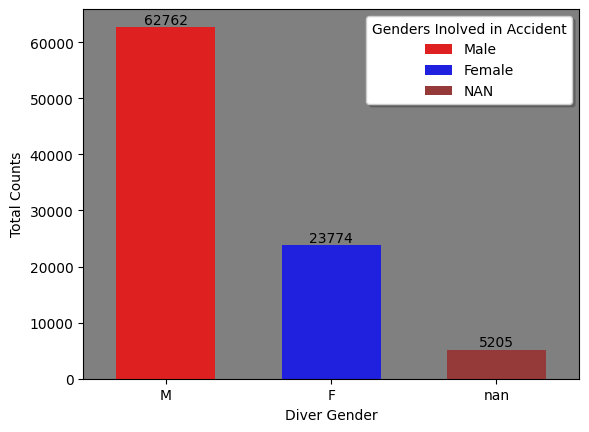

In [75]:
# Visualizing the Gender of the driver that are involved in the accident 
ax=sns.countplot(data=df,x=df['driver_gender'],palette=['red','blue','brown'],width=0.6)
plt.xlabel('Diver Gender')
plt.ylabel('Total Counts')
for bar in ax.containers:
    ax.bar_label(bar)
    ax.set_facecolor('gray')
    ax.legend(labels=['Male',"Female","NAN"],title='Genders Inolved in Accident',shadow=True)
plt.show()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_1408\1449936964.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df,x=df['drugs_related_stop'],palette=['blue','red'],width=0.6)


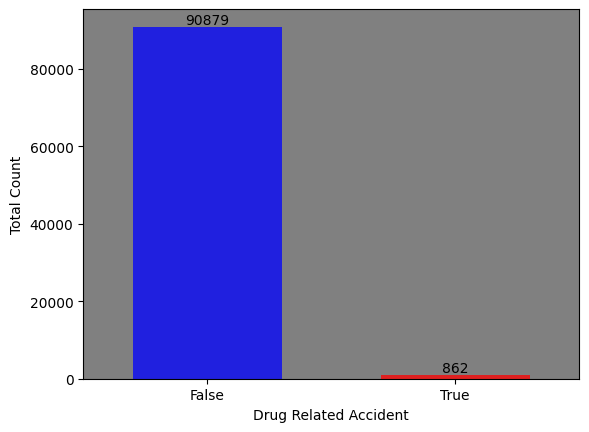

In [106]:
# Visualizing the number of accident occur due to Drugs
ax=sns.countplot(data=df,x=df['drugs_related_stop'],palette=['blue','red'],width=0.6)
for num in ax.containers:
    ax.bar_label(num)
    
plt.xlabel("Drug Related Accident")
plt.ylabel("Total Count")
ax.set_facecolor('gray')
plt.show()

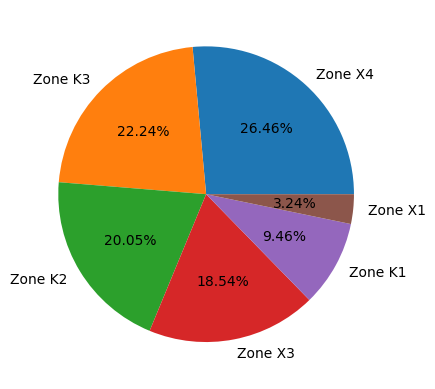

In [121]:
# Visualizing the Percentage  of accidents in every district by using the pie chart
x=df['district'].value_counts()
plt.pie(x,labels=x.index,autopct="%0.2f%%")
plt.show()